                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

<ipython-input-2-d246737008b0>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data.corr()


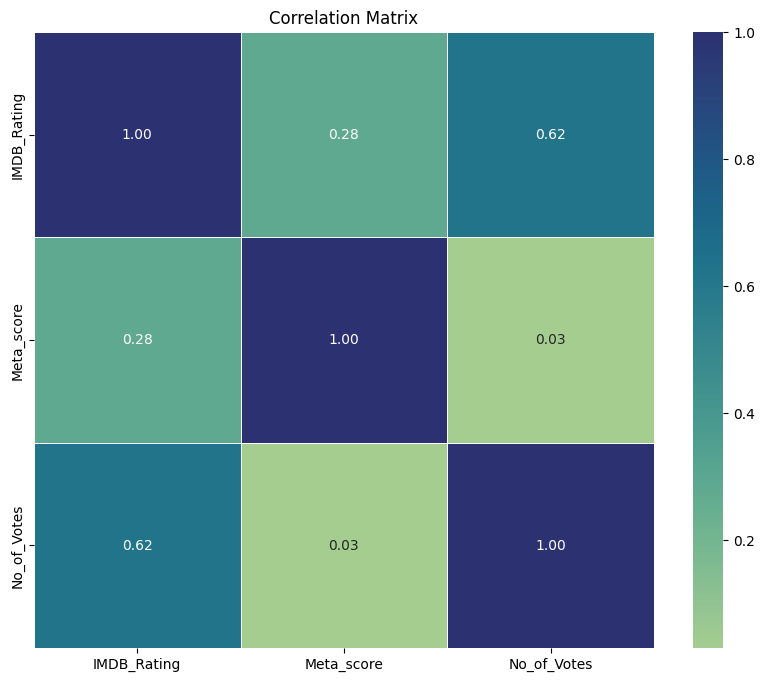

Top 20 Movies by IMDb Rating:
                                         Series_Title  \
0                            The Shawshank Redemption   
1                                       The Godfather   
2                                     The Dark Knight   
3                              The Godfather: Part II   
4                                        12 Angry Men   
5       The Lord of the Rings: The Return of the King   
6                                        Pulp Fiction   
7                                    Schindler's List   
10  The Lord of the Rings: The Fellowship of the Ring   
12                    Il buono, il brutto, il cattivo   
11                                       Forrest Gump   
9                                          Fight Club   
8                                           Inception   
13              The Lord of the Rings: The Two Towers   
14                                         The Matrix   
15                                         Goodfellas   
1

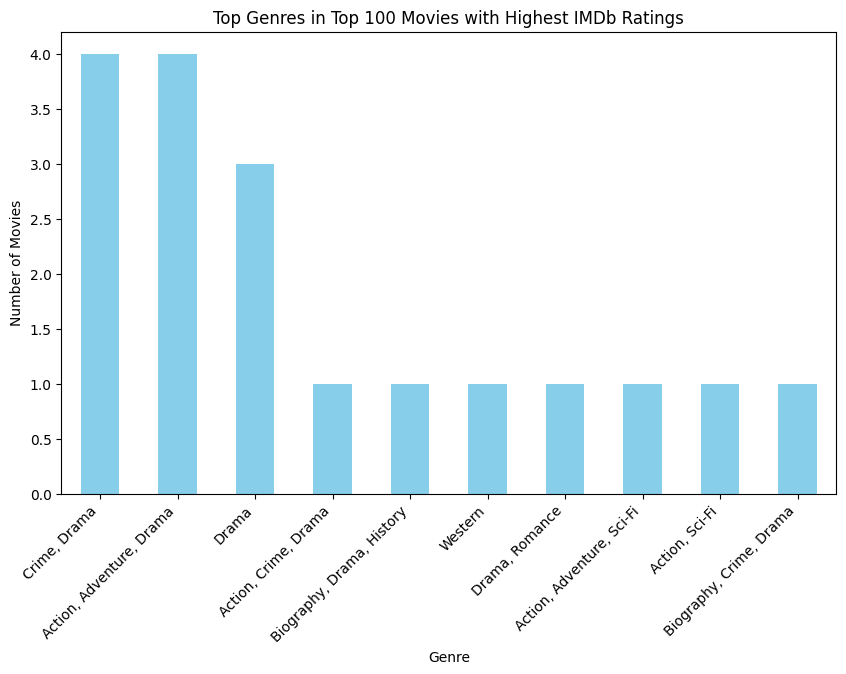

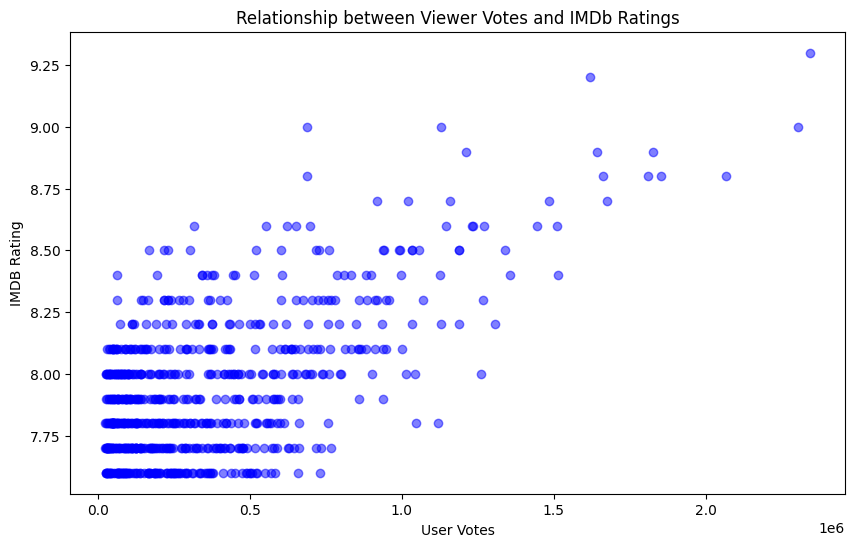


Average IMDb Rating by Director:
Director
Frank Darabont        8.95
Lana Wachowski        8.70
Irvin Kershner        8.70
George Lucas          8.60
Roberto Benigni       8.60
Fernando Meirelles    8.60
Milos Forman          8.50
Olivier Nakache       8.50
Charles Chaplin       8.50
Tony Kaye             8.50
Name: IMDB_Rating, dtype: float64

Average IMDb Ratings of Actor:
Star1
Tim Robbins        9.30
John Travolta      8.90
Elijah Wood        8.80
Lilly Wachowski    8.70
Marlon Brando      8.65
Daveigh Chase      8.60
Jodie Foster       8.60
Toshirô Mifune     8.60
Kátia Lund         8.60
Roberto Benigni    8.60
Name: IMDB_Rating, dtype: float64


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the IMDb dataset
imdb_df = pd.read_csv('imdb_top_1000.csv')

# Check the first few rows of the dataset
print(imdb_df.head())

# Check the info of the dataset
print(imdb_df.info())

# Check for missing values
print(imdb_df.isnull().sum())

# Drop rows with missing values
imdb_df.dropna(inplace=True)

# Drop unnecessary columns
imdb_df.drop(['Poster_Link','Overview','Star3','Star4'], axis=1, inplace=True)

# Correlation matrix
selected_columns = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime']
selected_data = imdb_df[selected_columns]
correlation_matrix = selected_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

# Sort the dataframe by IMDb Rating
imdb_df = imdb_df.sort_values(by='IMDB_Rating', ascending=False)

# Print top 20 movies by IMDb Rating
top_movies = imdb_df[['Series_Title', 'Genre', 'IMDB_Rating', 'Gross']].head(20)
print("Top 20 Movies by IMDb Rating:")
print(top_movies)

# Plot top genres
genre_counts = top_movies['Genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top Genres in Top 100 Movies with Highest IMDb Ratings')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

# Scatter plot of viewer votes vs IMDb Ratings
plt.figure(figsize=(10, 6))
plt.scatter(imdb_df['No_of_Votes'], imdb_df['IMDB_Rating'], alpha=0.5, color='blue')
plt.title('Relationship between Viewer Votes and IMDb Ratings')
plt.xlabel('User Votes')
plt.ylabel('IMDB Rating')
plt.show()

# Average IMDb Rating by Director
director_ratings = imdb_df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False)
print('\nAverage IMDb Rating by Director:')
print(director_ratings.head(10))

# Average IMDb Ratings of Actor
actor_ratings = imdb_df.groupby('Star1')['IMDB_Rating'].mean().sort_values(ascending=False)
print('\nAverage IMDb Ratings of Actor:')
print(actor_ratings.head(10))
